<a href="https://colab.research.google.com/github/theAnkitt/gittest/blob/main/stemming_and_lemmatization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
from nltk.stem import PorterStemmer as ps
pr = ps()
pr.stem("Walking")

'walk'

In [ ]:
pr.stem("walked")

'walk'

In [ ]:
pr.stem("walks")

'walk'

In [ ]:
pr.stem("ran")

'ran'

In [ ]:
pr.stem("bosses")

'boss'

In [ ]:
sentence = "Lemmatization is more sophisticated than stemming".split()

In [ ]:
print(sentence)

['Lemmatization', 'is', 'more', 'sophisticated', 'than', 'stemming']


In [ ]:
for i in sentence:
  print(pr.stem(i),end=" ")

lemmat is more sophist than stem 

In [ ]:
pr.stem("unnecessary")

'unnecessari'

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.corpus import wordnet

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
lemmatizer.lemmatize("walking",pos=wordnet.VERB)

'walk'

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
lemmatizer.lemmatize("going",pos=wordnet.VERB)

'go'

In [ ]:
lemmatizer.lemmatize("walking")

'walking'

In [ ]:
lemmatizer.lemmatize("better",pos=wordnet.ADJ) #adjective 

'good'

In [ ]:
lemmatizer.lemmatize("better",pos=wordnet.VERB)

'better'

In [ ]:
lemmatizer.lemmatize("better")

'better'

**Count Vectorizer**



In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [ ]:
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [ ]:
nltk.download("wordnet")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv


--2022-09-11 21:03:30--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  2.54MB/s    in 1.9s    

2022-09-11 21:03:33 (2.54 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [ ]:
df = pd.read_csv('bbc_text_cls.csv')

In [ ]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [ ]:
df.tail()

,text,labels
2220,BT program to beat dialler scams\n\nBT is intr...,tech
2221,Spam e-mails tempt net shoppers\n\nComputer us...,tech
2222,Be careful how you code\n\nA new European dire...,tech
2223,US cyber security chief resigns\n\nThe man mak...,tech
2224,Losing yourself in online gaming\n\nOnline rol...,tech


In [ ]:
inputs = df['text']
labels = df['labels']

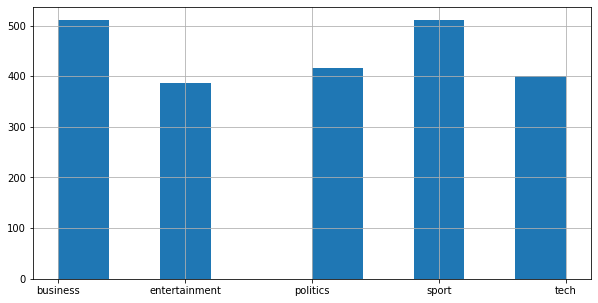

In [ ]:
labels.hist(figsize=(10,5))